In [1]:
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv(r'NASA_Power_Weather_Data_MAI1.csv')

In [3]:
Data

,LAT,LON,YEAR,MO,DY,AVG_Temp,MIN_Temp,MAX_Temp,AVG_DEW,Rainfall,RH,Pressure,Wind_Speed,Radiation,PET,AET,MAI,MAI_C
0,23.34281,87.81081,2009,1,1,17.59,10.73,24.51,11.15,0.00,66.30,101.01,1.69,7.46,68.541646,0.00,0.0,No
1,23.34281,87.81081,2009,1,2,15.93,10.04,23.49,10.08,0.00,68.42,101.20,2.69,7.29,62.028001,0.00,0.0,No
2,23.34281,87.81081,2009,1,3,15.00,8.18,22.52,8.34,0.00,64.69,101.25,2.29,7.29,58.618472,0.00,0.0,No
3,23.34281,87.81081,2009,1,4,15.49,8.16,22.71,8.42,0.00,63.21,101.08,1.66,7.47,60.394086,0.00,0.0,No
4,23.34281,87.81081,2009,1,5,17.31,10.55,23.97,11.17,0.01,68.45,100.91,1.31,7.80,67.403210,0.01,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,23.34281,87.81081,2019,12,27,13.31,8.27,19.16,9.44,5.24,77.22,101.11,3.27,8.06,52.836580,5.24,0.1,No
4013,23.34281,87.81081,2019,12,28,11.36,4.89,19.73,6.98,0.00,74.24,101.29,3.60,6.59,46.785402,0.00,0.0,No
4014,23.34281,87.81081,2019,12,29,12.02,5.10,21.38,7.01,0.00,71.14,101.29,3.56,6.47,48.762370,0.00,0.0,No
4015,23.34281,87.81081,2019,12,30,12.15,5.64,21.26,7.56,0.00,73.24,101.33,3.22,7.12,49.160202,0.00,0.0,No


Text(0, 0.5, 'Wind Speed(m/s))')

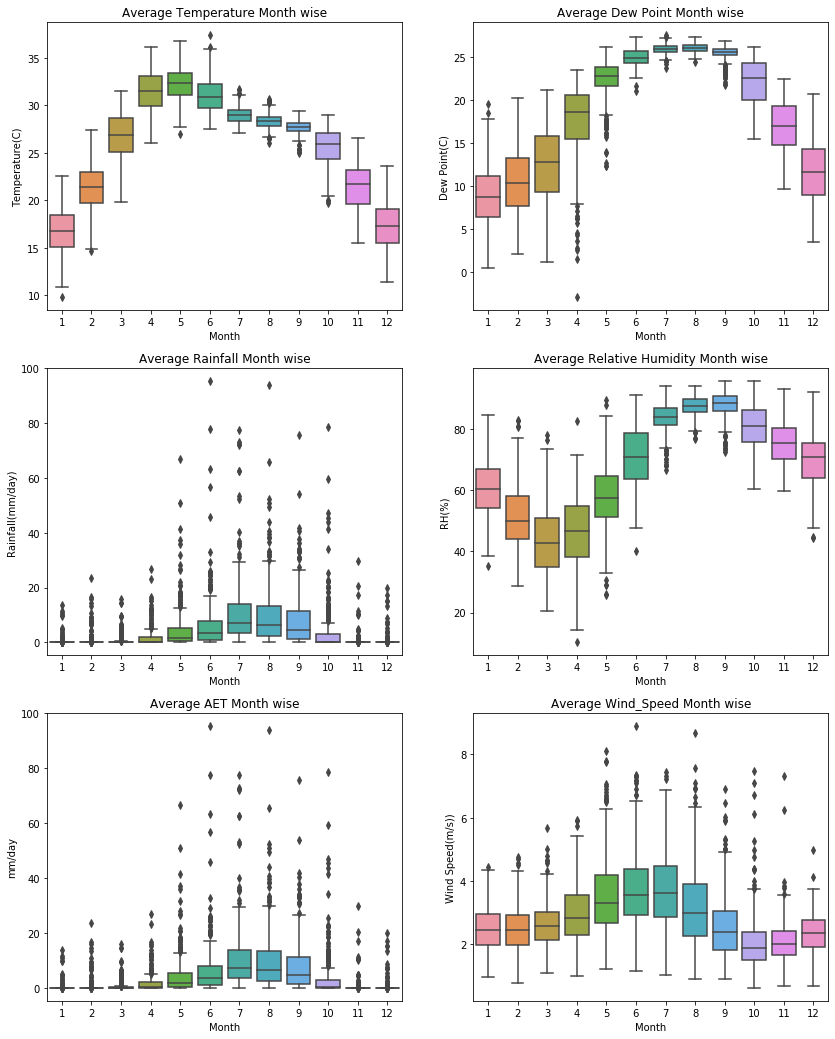

In [4]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
#Multiplotting
plt.figure(1, figsize=[14,18])

#Subplot 1
plt.subplot(3,2,1)
sns.boxplot(data=Data,y="AVG_Temp",x="MO")
plt.title("Average Temperature Month wise")
plt.xlabel("Month")
plt.ylabel("Temperature(C)")

#Subplot 2
plt.subplot(3,2,2)
sns.boxplot(data=Data,y="AVG_DEW",x="MO")
plt.title("Average Dew Point Month wise")
plt.xlabel("Month")
plt.ylabel("Dew Point(C)")

#Subplot 3
plt.subplot(3,2,3)
sns.boxplot(data=Data,y="Rainfall",x="MO")
plt.title("Average Rainfall Month wise")
plt.xlabel("Month")
plt.ylabel("Rainfall(mm/day)")
#Subplot 4
plt.subplot(3,2,4)
sns.boxplot(data=Data,y="RH",x="MO")
plt.title("Average Relative Humidity Month wise")
plt.xlabel("Month")
plt.ylabel("RH(%)")

#Subplot 5
plt.subplot(3,2,5)
sns.boxplot(data=Data,y="AET",x="MO")
plt.title("Average AET Month wise")
plt.xlabel("Month")
plt.ylabel("mm/day")
#Subplot 6
plt.subplot(3,2,6)
sns.boxplot(data=Data,y="Wind_Speed",x="MO")
plt.title("Average Wind_Speed Month wise")
plt.xlabel("Month")
plt.ylabel("Wind Speed(m/s))")

In [5]:
#Data1 = Data.drop(['Month', 'Year', 'Day', 'Sr. No'], axis = 1)
Data_Clean = Data.drop(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'MIN_Temp', 'MAX_Temp','MAI','MAI_C' ], axis = 1)

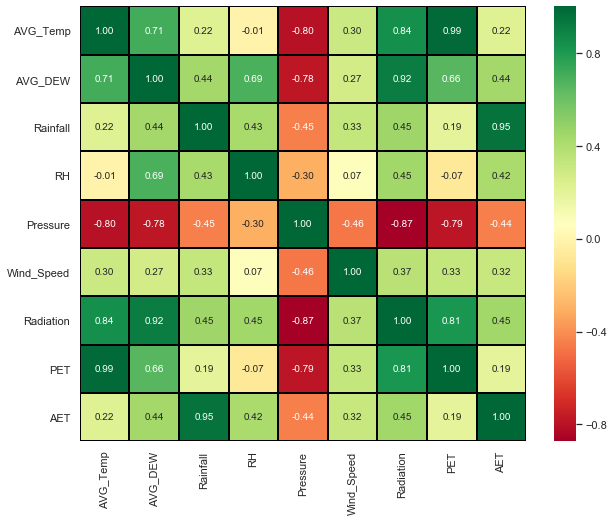

In [6]:
plt.figure(figsize=(10, 8))
corrmat = Data_Clean.corr()
top_corr_features = corrmat.index[abs(corrmat["AET"])>0.0]
sns.set(font_scale=1)
g = sns.heatmap(Data_Clean[top_corr_features].corr(),annot=True, fmt='.2f', annot_kws={'size': 10},cmap="RdYlGn", linewidths=1, linecolor='black')
sns.__version__
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [7]:
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 2)
description = Data_Clean.describe().T
print(description)

             count    mean    std    min    25%     50%     75%     max
AVG_Temp    4017.0   25.74   5.49   9.81  21.55   27.49   29.45   37.37
AVG_DEW     4017.0   18.74   6.89  -2.94  13.02   20.48   25.30   27.49
Rainfall    4017.0    3.93   8.03   0.00   0.00    0.29    4.50   95.40
RH          4017.0   67.97  17.45  10.27  54.85   70.61   83.57   95.62
Pressure    4017.0  100.30   0.63  98.52  99.78  100.30  100.86  101.66
Wind_Speed  4017.0    2.83   1.12   0.63   2.04    2.63    3.40    8.89
Radiation   4017.0    9.45   1.47   6.09   8.13    9.80   10.80   11.71
PET         4017.0  114.16  32.37  42.41  86.51  121.04  134.77  204.69
AET         4017.0    3.93   8.03   0.00   0.00    0.29    4.50   95.40


In [8]:
skew = Data_Clean.skew()
print(skew)

AVG_Temp     -0.55
AVG_DEW      -0.55
Rainfall      4.30
RH           -0.47
Pressure     -0.10
Wind_Speed    1.11
Radiation    -0.41
PET          -0.11
AET           4.30
dtype: float64


In [9]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
array = Data_Clean.values
# separate array into input and output components
X01 = array[:,0:8]
Y01 = array[:,8]
scaler = StandardScaler().fit(X01)
rescaled01 = scaler.transform(X01)
# summarize transformed data
set_printoptions(precision=3)
print(rescaled01)

[[-1.485 -1.102 -0.489 ... -1.015 -1.355 -1.409]
 [-1.787 -1.257 -0.489 ... -0.124 -1.471 -1.611]
 [-1.957 -1.51  -0.489 ... -0.48  -1.471 -1.716]
 ...
 [-2.499 -1.703 -0.489 ...  0.651 -2.029 -2.021]
 [-2.476 -1.623 -0.489 ...  0.349 -1.586 -2.008]
 [-2.199 -1.451 -0.489 ... -0.052 -1.607 -1.879]]


In [10]:
# Normalization data (between 0 and 1)
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = Data_Clean.values
# separate array into input and output components
X10 = array[:,0:8]
Y10 = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled10 = scaler.fit_transform(X10)
# summarize transformed data
set_printoptions(precision=2)
#print(rescaledX[0:5,:])
print(rescaled10)

[[0.28 0.46 0.   ... 0.13 0.24 0.16]
 [0.22 0.43 0.   ... 0.25 0.21 0.12]
 [0.19 0.37 0.   ... 0.2  0.21 0.1 ]
 ...
 [0.08 0.33 0.   ... 0.35 0.07 0.04]
 [0.08 0.35 0.   ... 0.31 0.18 0.04]
 [0.14 0.38 0.   ... 0.26 0.18 0.07]]


In [11]:
from sklearn.model_selection import train_test_split
%matplotlib inline
X_train,X_test,y_train,y_test=train_test_split(X10,Y10,test_size=0.30,random_state=100)


In [12]:
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 2)

In [13]:
#Imports
import numpy as np
from sklearn import model_selection
from sklearn.neural_network import MLPRegressor
#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=3,random_state=42)
#Logistic Regression Model
MLP = MLPRegressor(hidden_layer_sizes=(10,100,1000))
#results set equal to model with kfolds
results = model_selection.cross_val_score(MLP, X_train, y_train,cv=kfold)
#printing the averaged score over the 5 Kfolds
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean(), results.std()))

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 0.91% (0.02%)


In [14]:
#Imports
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=3,random_state=42)
#Logistic Regression Model
DT = DecisionTreeRegressor()
#results set equal to model with kfolds
results = model_selection.cross_val_score(DT, X_train, y_train,cv=kfold)
#printing the averaged score over the 5 Kfolds
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean(), results.std()))

Accuracy: 0.84% (0.00%)


c:\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [15]:
#Imports
import numpy as np
from sklearn.svm import SVR
from sklearn import model_selection
#seed for random state and splits - number of Kfolds
#random_seed = 1

#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=5,random_state=42)
#Logistic Regression Model
SVM = SVR()
#results set equal to model with kfolds
results = model_selection.cross_val_score(SVM, X_train, y_train,cv=kfold)
#print (results)
#printing the averaged score over the 5 Kfolds
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean(), results.std()))

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 0.85% (0.04%)


In [16]:
#Imports
import numpy as np
from sklearn.linear_model import Ridge
from sklearn import model_selection
#seed for random state and splits - number of Kfolds
#random_seed = 1

#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=5,random_state=42)
#Logistic Regression Model
RG = Ridge()
#results set equal to model with kfolds
results = model_selection.cross_val_score(RG, X_train, y_train,cv=kfold)
#print (results)
#printing the averaged score over the 5 Kfolds
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean(), results.std()))

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 0.92% (0.04%)


In [17]:
#Imports
import numpy as np
from sklearn.linear_model import Lasso
from sklearn import model_selection
#seed for random state and splits - number of Kfolds
#random_seed = 1

#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=5,random_state=42)
#Logistic Regression Model
LG = Lasso()
#results set equal to model with kfolds
results = model_selection.cross_val_score(LG, X_train, y_train,cv=kfold)
#print (results)
#printing the averaged score over the 5 Kfolds
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean(), results.std()))

Accuracy: 0.92% (0.04%)


c:\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [18]:
#Imports
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn import model_selection
#seed for random state and splits - number of Kfolds
#random_seed = 1

#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=5,random_state=42)
#Logistic Regression Model
EN = ElasticNet()
#results set equal to model with kfolds
results = model_selection.cross_val_score(EN, X_train, y_train,cv=kfold)
#print (results)
#printing the averaged score over the 5 Kfolds
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean(), results.std()))

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 0.92% (0.04%)


In [19]:
#Imports
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
#seed for random state and splits - number of Kfolds
#random_seed = 1

#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=5,random_state=42)
#Logistic Regression Model
KNN = KNeighborsRegressor()
#results set equal to model with kfolds
results = model_selection.cross_val_score(KNN, X_train, y_train,cv=kfold)
#print (results)
#printing the averaged score over the 5 Kfolds
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean(), results.std()))

Accuracy: 0.89% (0.03%)


c:\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [20]:
import warnings
warnings.filterwarnings('ignore')
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('MLP', MLPRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
# evaluate each model in turn
results = []
names = []
#scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%.2s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ML: 0.91 (0.04)
DT: 0.84 (0.04)
SV: 0.85 (0.04)
Ri: 0.92 (0.04)
La: 0.92 (0.04)
EN: 0.92 (0.04)
KN: 0.89 (0.03)


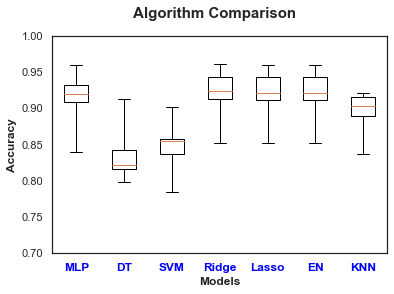

<Figure size 432x288 with 0 Axes>

In [21]:
# boxplot algorithm comparison
#plt.figure(figsize=[5,5])
#set_option('precision', 2)
plt.style.use('seaborn-ticks')
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure()
fig.suptitle('Algorithm Comparison', fontweight="bold", size=15)
ax = fig.add_subplot(111)
plt.boxplot(results, whis = 100)
ax.set_xticklabels(names, fontweight="bold", size=12, color = "blue")
plt.ylim(0.7, 1)
ax.set_xlabel('Models', fontweight="bold", size=12)
ax.set_ylabel('Accuracy', fontweight="bold", size=12)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
#ax.yaxis.set_ticks(np.arange(0.7, 1, 0.05))
plt.show()
plt.savefig('filename.png')

(0.7, 1)

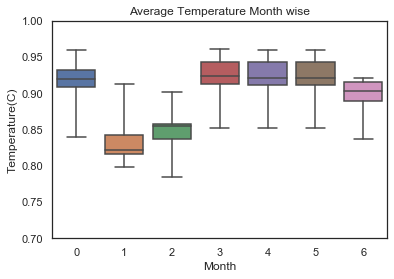

In [22]:
plt.subplot(1,1,1)
sns.boxplot(data=results, whis = 100)
plt.title("Average Temperature Month wise")
plt.xlabel("Month")
plt.ylabel("Temperature(C)")
plt.ylim(0.7, 1)

In [23]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(30,30), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                  learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                  random_state=100, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08) # Linear Kernel
nn.fit(X_train,y_train)
Neural_Net = nn.predict(X_test)

R-squared test score: 0.89


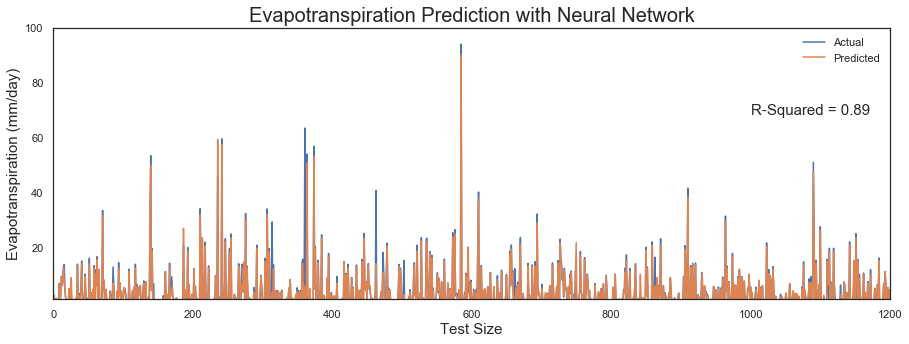

In [31]:
print('R-squared test score: {:.2f}'.format(nn.score(X_test,y_test))) # R-Squared test score
plt.style.use('seaborn-ticks')
plt.figure(figsize=(15,5))
plt.plot(y_test,label='Actual')
plt.plot(Neural_Net,label='Predicted')
plt.legend(loc=1)
plt.xlabel('Test Size', fontsize=15)
plt.ylabel('Evapotranspiration (mm/day)', fontsize=15)
plt.xlim([0,1200])
plt.ylim([1 ,100])
plt.title('Evapotranspiration Prediction with Neural Network', fontsize=20)
plt.text(1000,70,'R-Squared = %0.2f' % nn.score(X_test,y_test), horizontalalignment='left',verticalalignment='center',fontsize=15)
plt.show()

In [25]:
print (Neural_Net[0:10])

[ 0.21  2.42 -0.14 -0.27  1.35  0.7   0.21 -0.03  1.35  6.86]


In [26]:
print (y_test[0:10])

[0.   2.54 0.   0.   0.98 1.3  0.   0.   0.63 6.77]


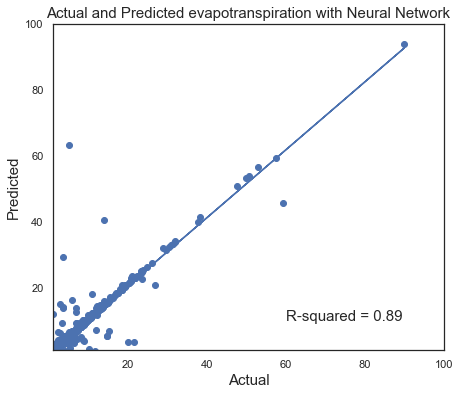

In [27]:
from matplotlib import pyplot
from numpy.polynomial.polynomial import polyfit
pyplot.figure(figsize=(7,6))
pyplot.style.use('seaborn-ticks')
pyplot.scatter(Neural_Net, y_test)

# Fit with polyfit
b, m = polyfit(Neural_Net, y_test, 1)
pyplot.plot(Neural_Net, b + m * Neural_Net, '-')

pyplot.xlabel('Actual', fontsize=15)
pyplot.ylabel('Predicted', fontsize=15)
plt.title('Actual and Predicted evapotranspiration with Neural Network', fontsize=15)

plt.text(60, 10, 'R-squared = %0.2f' % nn.score(X_test,y_test), fontsize=15)
pyplot.xlim([1,100])
pyplot.ylim([1 ,100])
pyplot.show()

In [28]:
print ("NN_train_score =", nn.score(X_train, y_train))
print ("NN_test_score =", nn.score(X_test, y_test))

NN_train_score = 0.9124861517950138
NN_test_score = 0.894358447782502


In [29]:
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [30]:

print ('R Squared %0.2f' % r2_score(y_test, Neural_Net))
print('-------------------')
print('Root Mean Square error %0.2f' % sqrt(mean_squared_error(y_test, Neural_Net)))
print('-------------------')
print('Mean Absolute error %0.2f' % (mean_absolute_error(y_test, Neural_Net)))

R Squared 0.89
-------------------
Root Mean Square error 2.49
-------------------
Mean Absolute error 0.72
